# Treemap plot of spectra per class distribution

In [1]:
import os

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv("../figures_data/gnps_classes.tbd", delimiter="\t")
data.head()

,class,count
0,Prenol lipids,2572
1,Carboxylic acids and derivatives,2366
2,Benzene and substituted derivatives,2034
3,Organooxygen compounds,1415
4,Steroids and steroid derivatives,1299


In [6]:
data["count"].quantile(np.arange(0, 1.1, 0.1))

0.0       1.0
0.1       1.0
0.2       2.0
0.3       4.0
0.4       6.0
0.5      10.0
0.6      15.0
0.7      28.0
0.8      53.6
0.9     120.0
1.0    2572.0
Name: count, dtype: float64

In [7]:
pd.qcut(data['count'], q=[0, 0.2, 0.5, 1])#, labels=np.arange(5))

0      (10.0, 2572.0]
1      (10.0, 2572.0]
2      (10.0, 2572.0]
3      (10.0, 2572.0]
4      (10.0, 2572.0]
            ...      
288      (0.999, 2.0]
289      (0.999, 2.0]
290      (0.999, 2.0]
291      (0.999, 2.0]
292      (0.999, 2.0]
Name: count, Length: 293, dtype: category
Categories (3, interval[float64, right]): [(0.999, 2.0] < (2.0, 10.0] < (10.0, 2572.0]]

In [8]:
splits = [0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
data["dezil"] = pd.qcut(data['count'], q=splits, labels=np.arange(9))
data.head()

,class,count,dezil
0,Prenol lipids,2572,8
1,Carboxylic acids and derivatives,2366,8
2,Benzene and substituted derivatives,2034,8
3,Organooxygen compounds,1415,8
4,Steroids and steroid derivatives,1299,8


In [9]:
data.shape

(293, 3)

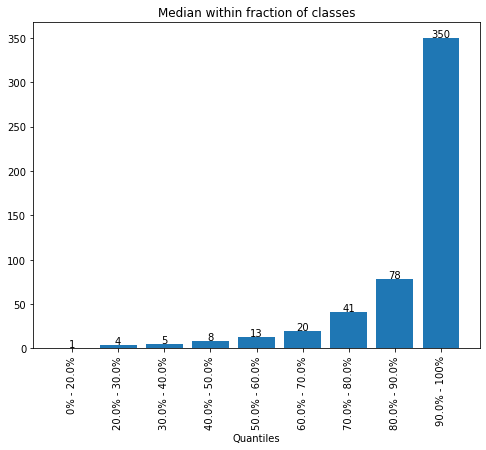

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x=np.arange(9), height=data.groupby("dezil").median()["count"])
for i, v in enumerate(data.groupby("dezil").median()["count"]):
    ax.text(i, v + 1, f"{v:.0f}", color='black', ha="center")

labels = [f"{100*splits[i]}% - {100*splits[i+1]}%" for i in range(9)]
plt.xticks(ticks=np.arange(9), labels=labels, rotation=90)
plt.xlabel("Quantiles")
plt.title("Median within fraction of classes")
#plt.savefig("data_science_income_percentiles.png", dpi=300)
plt.show()

In [13]:
data.groupby("dezil").sum()

,count
dezil,
0,92
1,104
2,129
3,250
4,363
5,596
6,1089
7,2505
8,18973


In [14]:
data.groupby('dezil').sum().values[0][0]

92

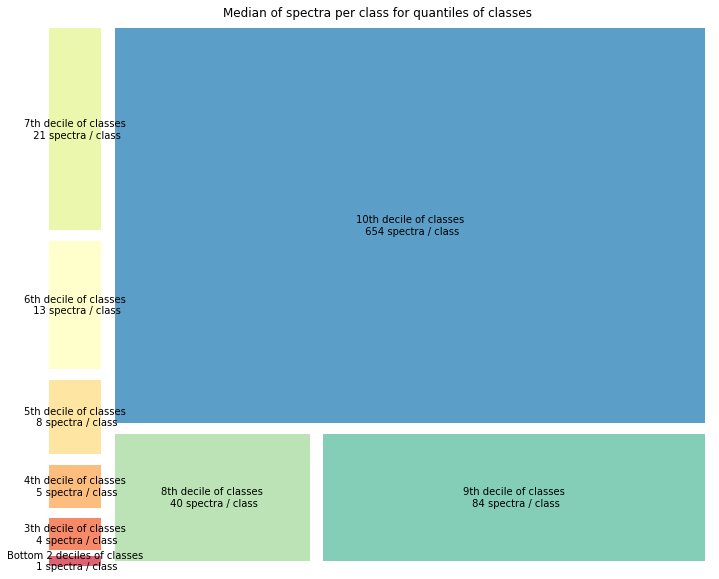

In [25]:
import squarify    # pip install squarify (algorithm for treemap)
import seaborn as sb

# labels
labels = ["Bottom 2 deciles of classes"] \
+ [f"{i+2}th decile of classes" for i in range(1,9)] #\
#+ [f"{100*splits[i]:.0f}% - {100*splits[i+1]:.0f}%" for i in range(1,8)] \
#+ ["90% - 100%"]

labels_full = []
for i, label in enumerate(labels):
    label = label + f"\n {data.groupby('dezil').mean()['count'].loc[i]:.0f} spectra / class"
    labels_full.append(label)

# plot
fig, ax = plt.subplots(figsize=(12, 10))
squarify.plot(sizes=data.groupby("dezil").median()["count"],
              label=labels_full,
              alpha=0.8,
              color=sb.color_palette("Spectral", 9), pad=2)
plt.axis('off')
plt.title("Median of spectra per class for quantiles of classes")
plt.savefig("hot_topics_treemap.png", dpi=300, bbox_inches='tight')
plt.show()

## other try
remove "unknown"

In [27]:
data = data.sort_values("count", ascending=False)
data = data[data["class"] != "Unknown"]
data[data["count"] > 10]

,class,count,dezil
0,Prenol lipids,2572,8
1,Carboxylic acids and derivatives,2366,8
2,Benzene and substituted derivatives,2034,8
3,Organooxygen compounds,1415,8
4,Steroids and steroid derivatives,1299,8
...,...,...,...
138,Coumarans,12,4
139,(5'->5')-dinucleotides,12,4
140,Emetine alkaloids,11,4
141,Benzopyrazoles,11,4


In [40]:
data[data["count"] > 50].shape[0]

63

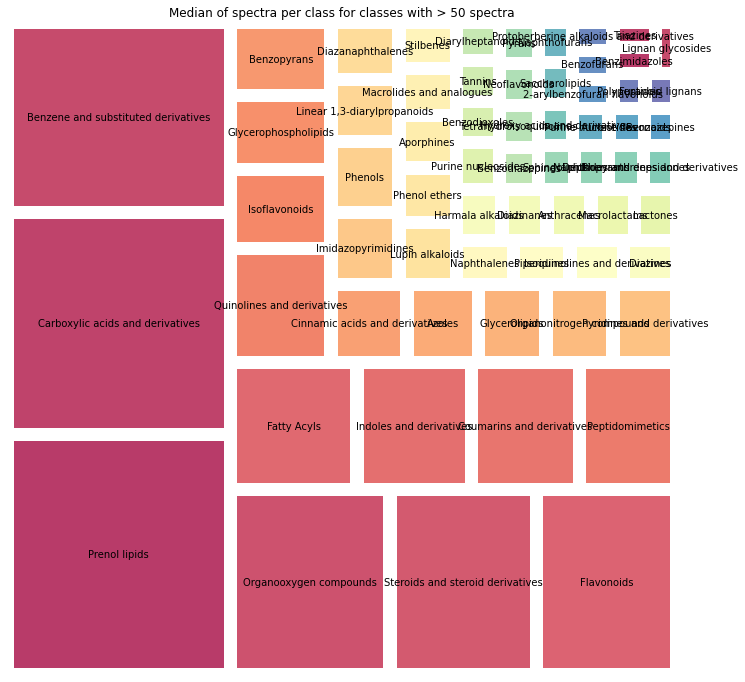

In [33]:
fig, ax = plt.subplots(figsize=(12, 12))
squarify.plot(sizes=data[data["count"] > 50]["count"], label=data["class"], alpha=0.8,
             color=sb.color_palette("Spectral", 60), pad=0.5)

plt.axis('off')
plt.title("Median of spectra per class for classes with > 50 spectra")
plt.savefig("hot_topics_treemap_classes_above_50.png", dpi=300, bbox_inches='tight')

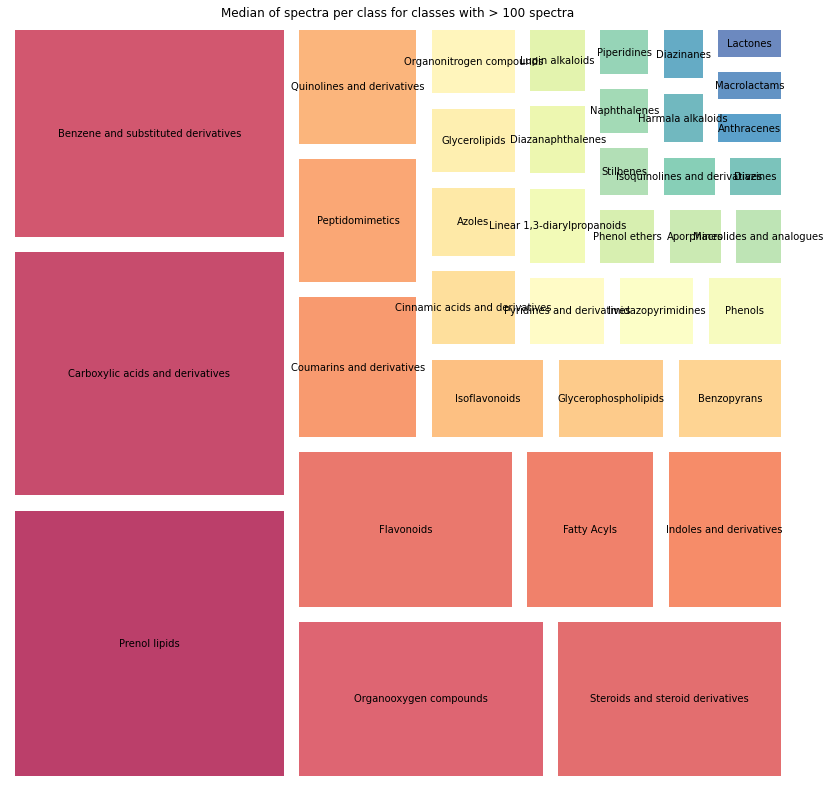

In [45]:
min_spec_per_class = 100
color_limit = data[data["count"] > min_spec_per_class].shape[0] + 1

fig, ax = plt.subplots(figsize=(14, 14))
squarify.plot(sizes=data[data["count"] > min_spec_per_class]["count"],
              label=data["class"], alpha=0.8,
              color=sb.color_palette("Spectral", color_limit), pad=0.5)

plt.axis('off')
plt.title(f"Median of spectra per class for classes with > {min_spec_per_class} spectra")
plt.savefig(f"hot_topics_treemap_classes_above_{min_spec_per_class}.png", dpi=300, bbox_inches='tight')